#  Введение в рекуррентные нейронные сети

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Николенко С., Кадурин А., Архангельская Е. Глубокое обучение.
* https://pytorch.org/docs/stable/nn.html#recurrent-layers
* https://karpathy.github.io/2015/05/21/rnn-effectiveness/
* https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html
* https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/
* https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

## Задачи для совместного разбора

1\. Рассмотрите пример работы одного шага простейшего рекуррентного слоя.  

$$ h' = tanh(W_{ih}x + W_{hh}h) $$

![RNN](https://kvitajakub.github.io/img/rnn-unrolled.png)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
batch_size = 16
seq_len = 8
embedding_dim = 32
hidden_dim = 10

x = th.rand(batch_size, seq_len, embedding_dim)

cell = nn.RNNCell( # A
    input_size=embedding_dim,
    hidden_size=hidden_dim
)


In [ ]:
x.shape, x

(torch.Size([16, 8, 32]),
 tensor([[[0.7734, 0.1478, 0.1853,  ..., 0.2314, 0.9029, 0.3037],
          [0.0725, 0.5420, 0.7410,  ..., 0.9987, 0.9912, 0.4840],
          [0.6196, 0.4241, 0.9948,  ..., 0.8348, 0.1005, 0.9112],
          ...,
          [0.6429, 0.0370, 0.3452,  ..., 0.9553, 0.8020, 0.5886],
          [0.8543, 0.6919, 0.3292,  ..., 0.8977, 0.7469, 0.5290],
          [0.8069, 0.3075, 0.9099,  ..., 0.1107, 0.2837, 0.5386]],
 
         [[0.7388, 0.1521, 0.6203,  ..., 0.6959, 0.4532, 0.8907],
          [0.1948, 0.8956, 0.3692,  ..., 0.1084, 0.8316, 0.9033],
          [0.7680, 0.9525, 0.8752,  ..., 0.3459, 0.7487, 0.8152],
          ...,
          [0.5308, 0.9156, 0.6266,  ..., 0.6590, 0.3048, 0.0695],
          [0.2392, 0.5883, 0.8057,  ..., 0.3980, 0.9793, 0.6347],
          [0.5318, 0.7852, 0.2184,  ..., 0.7187, 0.2541, 0.3870]],
 
         [[0.4715, 0.1218, 0.2727,  ..., 0.8108, 0.1406, 0.4195],
          [0.5267, 0.7488, 0.7811,  ..., 0.4060, 0.2070, 0.0595],
          [0.7

In [ ]:
for s in range(seq_len):
  x_i = x[:, s, :]
  print(x_i)
  h = cell(x_i, )
  break

tensor([[7.7336e-01, 1.4783e-01, 1.8535e-01, 5.5564e-02, 6.4648e-02, 2.0054e-01,
         1.9284e-01, 8.4226e-01, 9.5378e-01, 6.8610e-01, 2.3578e-01, 8.0492e-01,
         4.3514e-01, 4.0916e-01, 3.3907e-01, 3.6900e-01, 5.5215e-01, 3.2225e-01,
         3.7491e-01, 4.3838e-01, 7.6851e-03, 4.6813e-01, 7.5719e-01, 4.4451e-01,
         4.5270e-01, 9.5600e-01, 6.2375e-01, 6.2868e-02, 7.0192e-01, 2.3143e-01,
         9.0288e-01, 3.0375e-01],
        [7.3882e-01, 1.5215e-01, 6.2031e-01, 1.4022e-02, 6.7934e-01, 8.4130e-02,
         1.4351e-01, 5.4274e-01, 3.0125e-01, 1.0224e-01, 8.8288e-01, 2.4687e-02,
         3.2574e-01, 5.9855e-01, 7.5257e-02, 6.3263e-01, 1.3169e-02, 9.6614e-01,
         5.2573e-01, 7.7858e-01, 7.8511e-01, 7.6168e-01, 8.4720e-01, 2.8882e-01,
         4.3932e-01, 1.3406e-01, 2.2396e-01, 6.7325e-01, 3.4566e-01, 6.9589e-01,
         4.5319e-01, 8.9072e-01],
        [4.7147e-01, 1.2182e-01, 2.7269e-01, 9.5401e-01, 6.8823e-01, 1.3635e-01,
         9.1182e-01, 6.7463e-02, 6.4794e-

In [ ]:
h.shape

torch.Size([16, 10])

2\. Рассмотрите пример работы рекуррентных слоев из `torch.nn`.

In [ ]:
batch_size = 16
seq_len = 8
embedding_dim = 32
hidden_dim = 10

x = th.rand(batch_size, seq_len, embedding_dim)

In [ ]:
layer = nn.RNN(
    input_size=embedding_dim,
    hidden_size=hidden_dim,
    batch_first=True,
)

In [ ]:
o, h = layer(x)

In [ ]:
o.shape

torch.Size([16, 8, 10])

In [ ]:
h.shape

torch.Size([1, 16, 10])

In [ ]:
o[0, -1, :]

tensor([-0.3266,  0.7264,  0.4042, -0.5533, -0.8815, -0.9344, -0.7338, -0.6117,
        -0.0148,  0.3841], grad_fn=<SliceBackward0>)

In [ ]:
h[0, 0]

tensor([-0.3266,  0.7264,  0.4042, -0.5533, -0.8815, -0.9344, -0.7338, -0.6117,
        -0.0148,  0.3841], grad_fn=<SelectBackward0>)

In [ ]:
x1 = x.permute(1, 0, 2)
x1.shape

torch.Size([8, 16, 32])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя класс `nn.RNNCell` (абстракцию для отдельного временного шага RNN), реализуйте простейшую рекуррентную сеть Элмана в виде класса `RNN`. Предусмотрите возможность работы с двумя вариантами данных: где данные (x) представлены в виде (batch, seq, feature) и где данные представлены в формате (seq, batch, feature). Создайте тензор `x1` размера 16 x 8 x 32 (batch, seq, feature) и пропустите через модель `RNN`. Выведите на экран форму двух полученных тензоров. Проверьте, что тензор `output[-1]` поэлементно равен `h`.

- [ ] Проверено на семинаре

In [2]:
import torch.nn as nn
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        pass

    def forward(self, x, h=None):
      '''
      x.shape = (batch_size, seq_len, feature_size) - тензор входных данных
      h.shape = (batch_size, hidden_size) - тензор со скрытым состоянием RNN
      '''
      # инициализация тензора скрытых состояний
      # h = ...

      # проход по каждому элементу последовательностей s в батче и обновление скрытого состояния
      # h = RNNCell(s_t, h)

      # вернуть тензор всех наблюдавшихся скрытых состояний размера (batch_size, seq_len, hidden_size) и тензор скрытых состояний в последний момент времени

надо было реализовать в классе

batch_first – Если True, то тензоры ввода и вывода предоставляются как (batch, seq, feature) вместо (seq, batch, feature). Обратите внимание, что это не относится к скрытым состояниям или состояниям ячейки. Смотрите разделы ввода / вывода ниже для получения подробной информации. По умолчанию: False

In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.rnn = nn.RNNCell(self.input_size, self.hidden_size)

  def forward(self, x, h=None):
    '''
    x.shape = (batch_size, seq_len, feature_size) - тензор входных данных
    h.shape = (batch_size, hidden_size) - тензор со скрытым состоянием RNN
    '''

    batch_size, seq_len, feature_size = x.shape


    # инициализация тензора скрытых состояний
    h = th.zeros(batch_size, self.hidden_size)
    # print(h.size())

    # проход по каждому элементу последовательностей s в батче и обновление скрытого состояния
    # h = RNNCell(s_t, h)


    rnn_res = []
    for i in range(seq_len):
      h = self.rnn(x[:, i, :], h)
      rnn_res.append(h.tolist())

    # вернуть тензор всех наблюдавшихся скрытых состояний размера (batch_size, seq_len, hidden_size) и тензор скрытых состояний в последний момент времени
    return th.tensor(rnn_res), h

In [ ]:
batch_size, seq_len, feature_size = x.shape
batch_size, seq_len, feature_size

(16, 8, 32)

In [ ]:
batch_size = 16
seq_len = 8
feature_size = 32
x1 = th.randn(batch_size, seq_len, feature_size)
x1.shape, x[0]

(torch.Size([16, 8, 32]),
 tensor([[0.6385, 0.2875, 0.9133, 0.0426, 0.9902, 0.1220, 0.6566, 0.6208, 0.7023,
          0.4248, 0.1726, 0.1548, 0.5177, 0.3238, 0.9737, 0.4961, 0.1681, 0.7727,
          0.2147, 0.2172, 0.3761, 0.9538, 0.9145, 0.1355, 0.4576, 0.8648, 0.5424,
          0.1766, 0.4125, 0.3787, 0.6287, 0.8331],
         [0.3213, 0.5061, 0.1277, 0.2617, 0.6426, 0.3063, 0.0336, 0.3175, 0.0829,
          0.1145, 0.4272, 0.2314, 0.7366, 0.3063, 0.5526, 0.9210, 0.4716, 0.2657,
          0.8349, 0.6652, 0.4036, 0.2081, 0.4804, 0.3962, 0.3488, 0.7326, 0.6395,
          0.4589, 0.5793, 0.1599, 0.3185, 0.4886],
         [0.1151, 0.3587, 0.4558, 0.5781, 0.4956, 0.7841, 0.1627, 0.9700, 0.1707,
          0.4994, 0.6264, 0.4932, 0.6904, 0.6929, 0.4146, 0.5586, 0.3013, 0.1023,
          0.2555, 0.7506, 0.8143, 0.4219, 0.2408, 0.2351, 0.4284, 0.3162, 0.7647,
          0.7173, 0.7624, 0.9362, 0.6339, 0.1596],
         [0.8403, 0.9318, 0.5829, 0.4184, 0.0755, 0.1670, 0.4063, 0.1293, 0.4676,
 

In [ ]:
model = RNN(input_size= feature_size, hidden_size=16)
output, h = model(x); output

tensor([[[-0.3701, -0.1953,  0.0227,  ...,  0.4166, -0.7025,  0.5492],
         [-0.3194,  0.1344, -0.3388,  ...,  0.6316, -0.5019,  0.4131],
         [-0.0543,  0.0015,  0.0651,  ...,  0.3897, -0.5363,  0.6301],
         ...,
         [-0.3215,  0.1791, -0.3358,  ...,  0.8087, -0.7798,  0.4565],
         [-0.1646,  0.1167, -0.1412,  ...,  0.5119, -0.6354,  0.7213],
         [-0.4319,  0.1984,  0.0027,  ...,  0.1815, -0.5458,  0.2945]],

        [[ 0.3253,  0.4026, -0.3557,  ...,  0.5339, -0.7591,  0.3324],
         [-0.1894,  0.4400, -0.0409,  ...,  0.1979, -0.7027,  0.4911],
         [-0.3170,  0.7111, -0.6401,  ...,  0.7602, -0.7370,  0.4874],
         ...,
         [-0.3231,  0.5624, -0.5556,  ...,  0.2008, -0.6788,  0.1988],
         [-0.0203,  0.4330,  0.0627,  ...,  0.2329, -0.7096,  0.4798],
         [-0.1682,  0.2715, -0.3937,  ...,  0.5331, -0.6654, -0.1923]],

        [[-0.4382,  0.6483, -0.3878,  ...,  0.4730, -0.6770,  0.6573],
         [ 0.1763,  0.4358, -0.1540,  ...,  0

In [ ]:
output[-1] == h

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,

<p class="task" id="2"></p>

2\. Создайте тензор `x2` размера 8 x 16 x 32 (seq, batch, feature) и пропустите через модель `RNN`. Выведите на экран форму двух полученных тензоров. Проверьте, что тензор `output[-1]` поэлементно равен `h`.

- [ ] Проверено на семинаре

In [ ]:
seq_len = 8
batch_size = 16
feature_size = 32

x2 = th.randn(seq_len, batch_size, feature_size)
x2.shape, x2[0]

(torch.Size([8, 16, 32]),
 tensor([[-0.7795,  0.1245, -1.5351, -0.2994,  0.4207,  0.2871,  1.4589,  0.3334,
          -0.9730, -0.1334,  0.1967,  0.0755, -0.9697,  0.2974, -0.5075,  0.6159,
          -2.4241,  0.5189, -0.2760,  0.5573,  1.0010, -0.3791, -0.8961, -0.0211,
           1.7762,  0.7936,  0.1044,  0.8342, -0.1838, -0.9635,  3.0423, -0.6238],
         [-1.0295, -1.8341, -0.4516,  0.2181,  0.7604, -1.3527, -1.6349, -0.4814,
           0.0308,  0.7228, -1.9152, -0.7883, -0.9366, -0.6160,  0.4135,  0.2009,
           0.4360, -1.0005,  2.3987, -0.2342,  1.8494,  1.5165, -0.1588, -1.1472,
          -0.7223,  0.1136,  0.6073,  0.3397,  0.8866, -0.9356, -0.3654,  1.4839],
         [ 0.3899,  2.0677,  0.5675, -0.5387,  1.2298, -0.2764, -0.4124,  0.5018,
           0.3517,  0.8533, -0.1536,  0.0384,  0.3482, -0.5756,  0.2542, -0.3014,
           0.4925, -0.1246,  0.0535, -1.1723,  1.5093,  0.2097, -1.2987, -0.4598,
           0.2509, -0.7236, -0.2757, -0.0453,  1.1256, -0.5390, -0.454

In [ ]:
output, h = model(x2)
output

tensor([[[-0.0901,  0.7914,  0.1809,  ..., -0.6818,  0.5444,  0.8687],
         [ 0.4356, -0.5063,  0.0181,  ..., -0.7540, -0.1394,  0.7440],
         [ 0.1620, -0.8473,  0.5709,  ...,  0.8596,  0.8220,  0.0483],
         ...,
         [ 0.2863, -0.9405,  0.9664,  ...,  0.4809, -0.3914, -0.9446],
         [ 0.4234,  0.7449,  0.5612,  ..., -0.6807,  0.2503, -0.7296],
         [ 0.8418, -0.9856,  0.9327,  ...,  0.5433,  0.4727, -0.6978]],

        [[-0.8080, -0.7709,  0.7798,  ..., -0.5581,  0.5413, -0.9806],
         [ 0.9563, -0.8504,  0.9678,  ..., -0.7099,  0.6629,  0.4535],
         [ 0.4645, -0.6505,  0.7342,  ..., -0.6577, -0.1260, -0.6938],
         ...,
         [ 0.8621,  0.9108, -0.9348,  ...,  0.9592, -0.6962, -0.7937],
         [ 0.2193, -0.5180,  0.8283,  ..., -0.8325,  0.6819,  0.3195],
         [ 0.2604,  0.4698,  0.1107,  ...,  0.4756, -0.9426, -0.5435]],

        [[ 0.4004, -0.7457,  0.0855,  ..., -0.0409,  0.2083,  0.0882],
         [-0.1766, -0.6703,  0.1788,  ..., -0

In [ ]:
output[-1] == h

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True]])

<p class="task" id="3"></p>

3\. Считайте файл `pets.csv`, приведите имена питомцев к нижнем регистру. Решите проблему с противоречивостью данных (некоторые имена встречаются в обоих классах). Разбейте набор данных на обучающую и тестовую выборку.  Создайте Vocab на основе обучающей выборки (токен - __буква__). Добавьте в словарь специальный токен `<PAD>`. Выведите на экран количество токенов в полученном словаре.

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/pets.csv')
df.head()

,имя,класс
0,Арчи,собака
1,Алекс,собака
2,Амур,собака
3,Алтaй,собака
4,Альф,собака


In [ ]:
df['имя'] = df['имя'].apply(lambda x: x.lower())
df.head()

,имя,класс
0,арчи,собака
1,алекс,собака
2,амур,собака
3,алтaй,собака
4,альф,собака


In [ ]:
df['класс'].unique()

array(['собака', 'кошка'], dtype=object)

In [ ]:
df.shape

(3228, 2)

In [ ]:
df.duplicated().sum()

28

In [ ]:
df = df.drop_duplicates()
df.shape

(3200, 2)

In [ ]:
df[df['имя'].duplicated() == True]  # и кошка и собака

,имя,класс
1445,ася,кошка
1446,алиса,кошка
1447,анфиса,кошка
1448,аврора,кошка
1449,адель,кошка
...,...,...
3188,ягодка,кошка
3194,яшма,кошка
3196,ямайка,кошка
3204,яра,кошка


In [ ]:
df = df.drop(index = df[df['имя'].duplicated() == True].index)
df.shape

(2792, 2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['имя'],
    df['класс'],
    train_size = 0.8,
    random_state = 42
)

y_train.shape, y_test.shape

((2233,), (559,))

In [ ]:
from torchtext.vocab import Vocab
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
corpus_x_train = []
for name in list(X_train):
  corpus_x_train.append(list(name))
corpus_x_train

[['б', 'о', 'н', 'ь', 'к', 'а'],
 ['ф', 'р', 'о', 'с', 'я'],
 ['з', 'о', 'л', 'т', 'о', 'н'],
 ['м', 'е', 'л', 'л', 'и'],
 ['з', 'е', 'н', 'т', 'а'],
 ['з', 'а', 'л', 'ь', 'я', 'н', 'а'],
 ['в', 'е', 'р', 'о', 'н'],
 ['л', 'о', 'к', 'к', 'и'],
 ['ш', 'э', 'й', 'л', 'а'],
 ['ю', 'с', 'т', 'и', 'н', 'и', 'а', 'н'],
 ['ш', 'а', 'р', 'м', 'э', 'н'],
 ['п', 'о', 'л', 'н', 'о', 'ч', 'ь'],
 ['и', 'б', 'и', 'с'],
 ['ч', 'е', 'й', 'с', 'и'],
 ['а', 'л', 'и', 'с', 'и', 'я'],
 ['т', 'е', 'й', 'с', 'и'],
 ['т', 'о', 'р', 'и'],
 ['е', 'р', 'е', 'м', 'е', 'й'],
 ['р', 'о', 'у', 'з'],
 ['в', 'э', 'н', 'д', 'и'],
 ['а', 'г', 'н', 'е', 'с', 'с', 'а'],
 ['и', 'р', 'и', 'с', 'а'],
 ['п', 'а', 'н', 'и', ' ', 'з', 'о', 'с', 'я'],
 ['р', 'у', 'д', 'и'],
 ['х', 'а', 'л', 'и', 'ф'],
 ['ч', 'а', 'н', 'г', 'а'],
 ['т', 'е', 'м', 'н', 'а', 'я', ' ', 'з', 'в', 'е', 'з', 'д', 'а'],
 ['е', 'л', 'и', 'к', 'а'],
 ['с', 'к', 'а', 'р', 'л', 'е', 'т'],
 ['с', 'а', 'т', 'и'],
 ['б', 'р', 'и', 'т', 'н', 'и'],
 ['п', 'е', 

In [ ]:
token = ['PAD']

vocab = build_vocab_from_iterator(
    corpus_x_train,
    specials = token
)


In [ ]:
voc = build_vocab_from_iterator(corpus_x_train)

corpus_tr = [
    voc.lookup_indices(t)
    for t in corpus_x_train
]
corpus_tr

[[21, 8, 4, 18, 7, 0],
 [15, 3, 8, 6, 11],
 [23, 8, 2, 9, 8, 4],
 [10, 5, 2, 2, 1],
 [23, 5, 4, 9, 0],
 [23, 0, 2, 18, 11, 4, 0],
 [19, 5, 3, 8, 4],
 [2, 8, 7, 7, 1],
 [14, 22, 16, 2, 0],
 [27, 6, 9, 1, 4, 1, 0, 4],
 [14, 0, 3, 10, 22, 4],
 [17, 8, 2, 4, 8, 24, 18],
 [1, 21, 1, 6],
 [24, 5, 16, 6, 1],
 [0, 2, 1, 6, 1, 11],
 [9, 5, 16, 6, 1],
 [9, 8, 3, 1],
 [5, 3, 5, 10, 5, 16],
 [3, 8, 12, 23],
 [19, 22, 4, 13, 1],
 [0, 20, 4, 5, 6, 6, 0],
 [1, 3, 1, 6, 0],
 [17, 0, 4, 1, 29, 23, 8, 6, 11],
 [3, 12, 13, 1],
 [26, 0, 2, 1, 15],
 [24, 0, 4, 20, 0],
 [9, 5, 10, 4, 0, 11, 29, 23, 19, 5, 23, 13, 0],
 [5, 2, 1, 7, 0],
 [6, 7, 0, 3, 2, 5, 9],
 [6, 0, 9, 1],
 [21, 3, 1, 9, 4, 1],
 [17, 5, 3, 6, 1, 13, 0],
 [6, 0, 4, 13, 3, 0],
 [5, 10, 1, 2, 1],
 [26, 1, 6, 6, 5, 9, 9, 0],
 [17, 0, 10, 5, 2, 0],
 [23, 8, 3, 0, 4],
 [10, 0, 6, 11, 4, 11],
 [2, 5, 6, 9, 0],
 [10, 0, 7, 6],
 [27, 4, 11],
 [1, 4, 20, 0],
 [17, 0, 4, 1],
 [2, 0, 12, 3, 0],
 [15, 5, 15, 8, 24, 7, 0],
 [6, 1, 11],
 [17, 11, 9, 4, 12

In [ ]:
vocab.get_stoi()

{'p': 35,
 'a': 34,
 'ё': 33,
 '-': 32,
 'ы': 31,
 ' ': 30,
 'к': 8,
 'е': 6,
 'о': 9,
 'э': 23,
 'н': 5,
 'я': 12,
 'л': 3,
 'и': 2,
 'х': 27,
 'с': 7,
 'а': 1,
 'в': 20,
 'м': 11,
 'PAD': 0,
 'ж': 26,
 'у': 13,
 'д': 14,
 'ш': 15,
 'р': 4,
 'ф': 16,
 'б': 22,
 'й': 17,
 'ч': 25,
 'т': 10,
 'п': 18,
 'ц': 29,
 'ь': 19,
 'г': 21,
 'з': 24,
 'ю': 28}

In [ ]:
# кол-во токенов
len(vocab)

36

In [ ]:
# перерешанное
corpus_tr = [[j for j in i] for i in list(train['имя'])]
corpus_ts = [[j for j in i] for i in list(test['имя'])]

In [ ]:
vocab = build_vocab_from_iterator(corpus_tr, specials = ['<PAD>'])
len(vocab)

In [ ]:
import numpy as np
label_tr = train['класс']
label_ts= test['класс']

map = {j:i for i, j in enumerate(np.unique(label_tr))}
th.tensor(label_tr.map(map).values)

<p class="task" id="4"></p>

4\. Создайте класс `PetsDataset`. Используя преобразования, сделайте длины наборов индексов одинаковой фиксированной длины (подходящее значение определите сами). Закодируйте целыми числами классы питомцев. Создайте два объекта класса `PetsDataset` (для обучающей и тестовой выборки). Выведите на экран их длины.

- [ ] Проверено на семинаре

In [ ]:
# map =
map = {j:i for i, j in enumerate(y_train.unique())}
y_train.map(map).values

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
from torch.nn.utils.rnn import pad_sequence

corpus_tr = pad_sequence([th.tensor(i) for i in corpus_tr], batch_first=True)
corpus_tr

tensor([[21,  8,  4,  ...,  0,  0,  0],
        [15,  3,  8,  ...,  0,  0,  0],
        [23,  8,  2,  ...,  0,  0,  0],
        ...,
        [ 4,  8, 24,  ...,  0,  0,  0],
        [15,  5, 11,  ...,  0,  0,  0],
        [21,  5,  2,  ...,  0,  0,  0]])

In [ ]:
class PetsDataset:

  def __init__(self, x,y):

    self.x = x
    self.y = y
    # corpus = []
    # for name in list(self.x):
    #   corpus.append(list(name))
    # self.corpus = corpus
    # self.vocab = build_vocab_from_iterator(self.corpus, )

  def __getitem__(self, idx):

    if type(idx) == int:  # не срез
      idx = slice(idx, idx+1)

    # срезы
    self.x = self.x[idx]

    map = {j:i for i, j in enumerate(self.y.unique())}
    labels = th.tensor(self.y.map(map).values)

    labels = labels[idx]

    corpus = []
    for name in list(self.x):
      corpus.append(list(name))
    vocab = build_vocab_from_iterator(corpus, )

    # labels = labels.unsqueeze(1)


    corpus_ = [
        vocab.lookup_indices(t)
        for t in corpus]
    # corpus_res = pad_sequence([th.tensor(i) for i in corpus_], batch_first=True)


    max_len = max([len(i) for i in corpus_])   # выравнивание размерности тензора

    for i in range(len(corpus_)):
      # print(corpus_tr[i])
      while len(corpus_[i]) <=  max_len:
        corpus_[i].append(0)


    return th.tensor(corpus_).to(th.float32), th.tensor(labels).to(th.float32)
    # return th.FloatTensor(corpus_res.to(th.float32)), th.tensor(labels)

  def __len__(self):
    return self.x.shape[0]


In [ ]:
class PetsDataset:
  def __init__(self, x, y):
    self.x = x
    self.y = y


  def transform(self):

    map = {j:i for i, j in enumerate(self.y.unique())}
    labels = th.tensor(self.y.map(map).values)

    corpus = []
    for name in list(self.x):
      corpus.append(list(name))

    vocab = build_vocab_from_iterator(corpus,
                                      specials = ['<PAD>'])
    corpus_ = [
        vocab.lookup_indices(t)
        for t in corpus]

    corpus_res = pad_sequence([th.tensor(i) for i in corpus_], batch_first=True)


    return corpus_res.to(th.float32), labels.to(th.float32)

  def __len__(self):
      return self.x.shape[0]
  # def __len__(self):
  #   if self.corpus_pad is None:
  #     self.transform()
  #   return len(self.corpus_pad)


In [ ]:
train = PetsDataset(X_train, y_train)
train.transform()

(tensor([[22.,  9.,  5.,  ...,  0.,  0.,  0.],
         [16.,  4.,  9.,  ...,  0.,  0.,  0.],
         [24.,  9.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [ 5.,  9., 25.,  ...,  0.,  0.,  0.],
         [16.,  6., 12.,  ...,  0.,  0.,  0.],
         [22.,  6.,  3.,  ...,  0.,  0.,  0.]]),
 tensor([0., 0., 1.,  ..., 1., 1., 1.]))

In [ ]:
test = PetsDataset(X_test, y_test)
test.transform()

(tensor([[16.,  8., 14.,  ...,  0.,  0.,  0.],
         [ 5.,  9.,  3.,  ...,  0.,  0.,  0.],
         [16.,  2.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [10.,  9., 10.,  ...,  0.,  0.,  0.],
         [14.,  1.,  3.,  ...,  0.,  0.,  0.],
         [12.,  5.,  4.,  ...,  0.,  0.,  0.]]),
 tensor([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
         1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
         1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
         1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
         1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
         0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0

In [ ]:
# длины

train_ = PetsDataset(X_train, y_train)
test_ = PetsDataset(X_test, y_test)
len(train_), len(test_)

(2233, 559)

In [ ]:
train.transform()[0].shape, test.transform()[0].shape,

(torch.Size([2233, 22]), torch.Size([559, 19]))

In [ ]:

# переделанное
max_len = max(max([len(i) for i in corpus_tr]), max([len(i) for i in corpus_ts]))

class PetsDataset:
    def __init__(self, corpus, vocab, label):
        self.corpus = corpus
        self.label = label
        self.vocab = vocab
        self.transform = T.Sequential(
            T.VocabTransform(self.vocab),
            T.ToTensor(padding_value = 0),
            T.PadTransform(max_length = max_len, pad_value = 0)
        )

    def __getitem__(self, idx):
        if type(idx) == int:
            idx = slice(idx, idx+1)
        map = {j:i for i, j in enumerate(np.unique(label_tr))}
        y = th.tensor(self.label[idx].map(map).values)
        x = self.transform(self.corpus[idx])

        return x, y


    def __len__(self):
        return len(self.corpus)

In [ ]:
train_dataset = PetsDataset(corpus_tr, vocab, label_tr)
test_dataset = PetsDataset(corpus_ts, vocab, label_ts)

<p class="task" id="5"></p>

5\. Используя созданный класс `RNN`, решите задачу классификации категорий питомцев по их именам. Выведите на экран отчет по классификации на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# corpus_tr = []
# for name in X_train:
#   corpus_tr.append(list(name))

# vocab_tr = build_vocab_from_iterator(
#     corpus_tr,
#     specials = ['<PAD>']
# )

# corpus_train = [
#     vocab_tr.lookup_indices(t)
#     for t in corpus_tr
# ]


# train_ = pad_sequence([th.tensor(i) for i in corpus_train], batch_first=True)
# train_.shape

In [ ]:
# corpus_ts = []
# for name in X_test:
#   corpus_ts.append(list(name))

# vocab_ts = build_vocab_from_iterator(
#     corpus_ts,
#     specials = ['<PAD>']
# )

# corpus_test = [
#     vocab_ts.lookup_indices(t)
#     for t in corpus_ts
# ]


# test_ = pad_sequence([th.tensor(i) for i in corpus_test], batch_first=True)
# test_.shape

In [ ]:
train_ds = train.transform()
test_ds = test.transform()
train_ds

(tensor([[22.,  9.,  5.,  ...,  0.,  0.,  0.],
         [16.,  4.,  9.,  ...,  0.,  0.,  0.],
         [24.,  9.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [ 5.,  9., 25.,  ...,  0.,  0.,  0.],
         [16.,  6., 12.,  ...,  0.,  0.,  0.],
         [22.,  6.,  3.,  ...,  0.,  0.,  0.]]),
 tensor([0., 0., 1.,  ..., 1., 1., 1.]))

In [ ]:
x_tr = train_ds[0].requires_grad_(True)
y_tr =  train_ds[1].requires_grad_(True)


x_ts = test_ds[0].requires_grad_(True)
y_ts =  test_ds[1].requires_grad_(True)
x_tr

tensor([[22.,  9.,  5.,  ...,  0.,  0.,  0.],
        [16.,  4.,  9.,  ...,  0.,  0.,  0.],
        [24.,  9.,  3.,  ...,  0.,  0.,  0.],
        ...,
        [ 5.,  9., 25.,  ...,  0.,  0.,  0.],
        [16.,  6., 12.,  ...,  0.,  0.,  0.],
        [22.,  6.,  3.,  ...,  0.,  0.,  0.]], requires_grad=True)

In [ ]:
x_tr.shape

torch.Size([2233, 22])

In [ ]:
train_dataset = TensorDataset(x_tr, y_tr)
test_dataset = TensorDataset(x_ts, y_ts)

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

In [ ]:
model = RNN(
    input_size = x_tr.shape[1],
    hidden_size = 32
)

optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 10
criterion = nn.CrossEntropyLoss()

losses = []
y_pr_train = []

for epoch in range(n_epochs):

  for x_train, y_train in train_loader:

    # x_train = x_train.requires_grad_(True)
    # y_train = y_train.requires_grad_(True)

    out = model(x_train.unsqueeze(1))[0]
    out.requires_grad = True
    # print(out.shape, y_train.shape)
    loss = criterion(out.squeeze(), y_train.long())
    y_pred_train = th.argmax(out, dim=1)   #  предсказанный класс
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  y_pr_train.append(y_pred_train)
  losses.append(loss)
  print(f"{epoch+1}/{n_epochs} {loss.item()=}")

  for x_test, y_test in test_loader:
    out = model(x_train.unsqueeze(1))[0]
    out.requires_grad = True
    # print(out.shape, y_train.shape)

1/10 loss.item()=3.8661601543426514
2/10 loss.item()=3.783756732940674
3/10 loss.item()=3.7252283096313477
4/10 loss.item()=3.671879768371582
5/10 loss.item()=3.7048704624176025
6/10 loss.item()=3.9105684757232666
7/10 loss.item()=3.508491277694702
8/10 loss.item()=3.5204646587371826
9/10 loss.item()=3.6964457035064697
10/10 loss.item()=3.6582605838775635


Text(0, 0.5, 'Значение Loss')

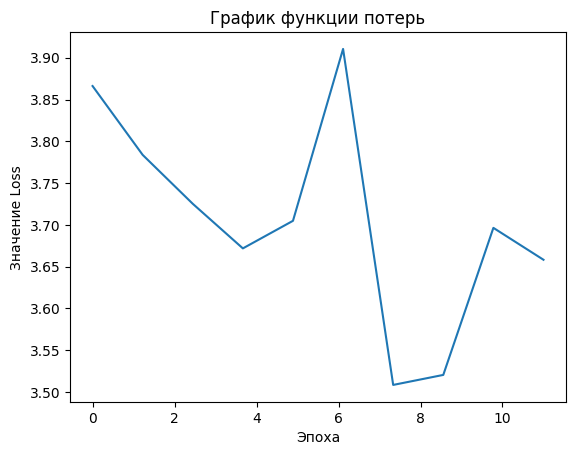

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# график потерь

plt.plot(th.linspace(0, n_epochs+1, n_epochs), th.tensor(losses))
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Значение Loss')

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 50


acc_train = []
acc_test = []
losses = []
for epoch in range(n_epochs):
    train_true = []
    train_pred = []

    test_true = []
    test_pred = []

    for x_train, y_train in train_loader:
        out, h = model(x_train)
        loss = criterion(out.squeeze(1), y_train.squeeze(1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        train_true.extend(y_train.tolist())
        train_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())

    losses.append(loss.item())

    for x_test, y_test in test_loader:
        out, h = model(x_test)
        test_true.extend(y_test.tolist())
        test_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())



    print(f'Epoch : {epoch+1} --> Loss : {loss.item()}\nAccuracy train {accuracy_score(y_pred = train_pred, y_true = train_true)}\nAccuracy test {accuracy_score(y_pred = test_pred, y_true = test_true)}')

<p class="task" id="6"></p>

6\. Решите предыщую задачу, заменив собственный модуль `RNN` на модули `nn.RNN`, `nn.LSTM` и `nn.GRU`. Сравните результаты работы.

- [ ] Проверено на семинаре

In [ ]:
model = nn.RNN(input_size = 22, hidden_size = n_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 20


acc_train = []
acc_test = []
losses = []
for epoch in range(n_epochs):
    train_true = []
    train_pred = []

    test_true = []
    test_pred = []

    for x_train, y_train in train_loader:
        out, h = model(x_train)
        loss = criterion(out.squeeze(1), y_train.squeeze(1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        train_true.extend(y_train.tolist())
        train_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())

    losses.append(loss.item())

    for x_test, y_test in test_loader:
        out, h = model(x_test)
        test_true.extend(y_test.tolist())
        test_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())



    print(f'Epoch : {epoch+1} --> Loss : {loss.item()}\nAccuracy train {accuracy_score(y_pred = train_pred, y_true = train_true)}\nAccuracy test {accuracy_score(y_pred = test_pred, y_true = test_true)}\n')

In [ ]:
model = nn.LSTM(input_size = 22, hidden_size = n_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 20


acc_train = []
acc_test = []
losses = []
for epoch in range(n_epochs):
    train_true = []
    train_pred = []

    test_true = []
    test_pred = []

    for x_train, y_train in train_loader:
        out, h = model(x_train)
        loss = criterion(out.squeeze(1), y_train.squeeze(1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        train_true.extend(y_train.tolist())
        train_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())

    losses.append(loss.item())

    for x_test, y_test in test_loader:
        out, h = model(x_test)
        test_true.extend(y_test.tolist())
        test_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())



    print(f'Epoch : {epoch+1} --> Loss : {loss.item()}\nAccuracy train {accuracy_score(y_pred = train_pred, y_true = train_true)}\nAccuracy test {accuracy_score(y_pred = test_pred, y_true = test_true)}')

In [ ]:
model = nn.GRU(input_size = 22, hidden_size = n_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
n_epochs = 5


acc_train = []
acc_test = []
losses = []
for epoch in range(n_epochs):
    train_true = []
    train_pred = []

    test_true = []
    test_pred = []

    for x_train, y_train in train_loader:
        out, h = model(x_train)
        loss = criterion(out.squeeze(1), y_train.squeeze(1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        train_true.extend(y_train.tolist())
        train_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())

    losses.append(loss.item())

    for x_test, y_test in test_loader:
        out, h = model(x_test)
        test_true.extend(y_test.tolist())
        test_pred.extend(th.argmax(out.squeeze(1), dim = 1).tolist())



    print(f'Epoch : {epoch+1} --> Loss : {loss.item()}\nAccuracy train {accuracy_score(y_pred = train_pred, y_true = train_true)}\nAccuracy test {accuracy_score(y_pred = test_pred, y_true = test_true)}')

## Обратная связь
- [ ] Хочу получить обратную связь по решению